# The Bechdel Test: is it stupider than the stupid test?
## No. It measures something meaningful, even if no one can agree on exactly what.

The Internet has been afire recently about the recent National Review article by Kyle Smith, <a href='http://www.nationalreview.com/article/449340/bechdel-test-feminist-litmus-test-movies-useless-political-correctness'>If You Like Art, Don’t Take the Bechdel Test</a>. Smith argues that the Bechdel test is nothing more than a political-correctness litmus test, useless for saying anything meaningful about movies.

There have already been many interesting responses to the piece, like <a href='http://www.salon.com/2017/07/11/national-review-bechdel-test/'>this one from Salon</a> and <a href='http://ew.com/movies/2017/07/10/kyle-smith-slammed-bechdel-test-takedown/'>this one from Entertainment Weekly</a>. But what can we learn from actually looking at the data?

The Bechdel test's origin lies in 1985 comic by <a href='http://dykestowatchoutfor.com/'>Alison Bechdel</a>, author of the print and online comic strip <a href='http://dykestowatchoutfor.com/strip-archive-by-number'>Dykes to Watch Out For</a>. In that particular comic, called <a href='http://dykestowatchoutfor.com/wp-content/uploads/2014/05/The-Rule-cleaned-up.jpg'>The Rule</a>, one female character explains to another a rule she uses to decide what movie to see.

<ol>
<li>It has to have at least two women in it, who...</li>
<li>talk to each other...</li>
<li>about something other than a man.</li>
</ol>

The implication was clear: such a test seems like an absurdly low bar, but shockingly few well-known films actually pass.

The test stayed there, and unnammed, until the early 2000s. At that time, it started to be discussed in film schools and on movie blogs, and gained the name of its initial author. In 2013, a chain of theaters in Sweden started <a href='https://www.theguardian.com/world/2013/nov/06/swedish-cinemas-bechdel-test-films-gender-bias'>issuing ratings indicating whether or not their movies passed the Bechdel test</a>. Bechdel herself says that <a href='http://dykestowatchoutfor.com/testy'>she feels some ambivalence about the test being named after her</a>, preferring to credit her friend Liz Wallace for adapting an idea first raised by Virginia Woolf in 1926.

The Bechdel test continues to draw attention from both academics and journalists. In 2014, Walt Hickey of fivethirtyeight.com <a href='http://calvinandhobbes.wikia.com/wiki/Calvinball'>gathered data from 1,615 Hollywood films</a> and found that while movies that pass the Bechdel test tend to have lower budgets than those that fail, they do no worse at the box office, whether measured by gross receipts or by profits. <a href='http://www.brianckeegan.com/2014/04/the-need-for-openness-in-data-journalism/'>A follow-up study</a> by Brian Keegan extended Hickey's work, finding that films that pass the test get higher revenues, better ratings from critics, and slightly worse ratings from IMDb users.

Last week, the Bechdel test entered the news again, thanks to Smith's National Review article. Smith points out that the test returns some odd results: <em>Showgirls</em> passes, while all three <em>Lord of the Rings</em> movies fail. Given those counterintuitive results, Smith asks, is the Bechdel test even meaningful? Or is it merely a "feminist Good Housekeeping Seal of approval" with no purpose other than to beat political correctness into creators and viewers? He suggests the "cowboy test": does the movie have a cowboy? The cowboy test, he argues, is just as arbitrary and meaningless as the Bechdel test.

Smith's critics might suggest he has an axe to grind, but he makes a valid point. If the Bechdel test is important enough to influence decisions about what movies to make and what movies to see, then it is important enough to evaluate. Never mind whether the Bechdel test measures women's representation in Hollywood. Does the Bechdel test measure <strong>anything</strong>?

That is the question I seek to answer here. Note that this question is much easier to answer - we don't need to make any assumptions about what the Bechdel test measures. One of the ways that researchers answer such a question is through <em>convergent validity</em> - how well the test correlates with other measures we are interested in. When the test score goes up, do other variables also go up, or down, or stay the same? The "other variables" in this case might include things like budgets, revenue, and ratings. Of course, we already have strong evidence for the convergent validity of the Bechdel test, thanks to the work of Hickey, Keegan, and others. But that might not be enough to satisfy skeptics. Sure, they might say, results of the Bechedel test correlate with these variables - but maybe results of the cowboy test would too.

Scoring a broad representative sample of movies on the newly-invented cowboy test would be difficult, but Smith doesn't really care about cowboys - his point is that the test is arbitrary and meaningless. Fortunately, it is easy to make a test that is certain to be meaningless - we can assign a random number 1 or 0 to each movie. That test is even stupider than the cowboy test - so stupid we could call it the "stupid test." What can we say about the convergent validity of the stupid test?

Kyle Smith thinks the Bechdel test is stupid. But is it as stupid as the stupid test?

## The data

I collected data from several websites, following the methods of Hickey and Keegan. I am extremely grateful to Brian Keegan to making all his scripts available - I was able to adapt them to do this study, which saved me literally weeks of work.

Movie titles and Bechdel test information come from the <a href='http://bechdeltest.com/'>Bechdel Test Movie List</a> website, which collects user-submitted information about whether movies pass or fail the Bechdel test. Financial data come from <a href='http://www.the-numbers.com/'>The Numbers</a>, supplemented with data for a few titles from the <a href="http://omdbapi.com/">Open Movie Database</a> (OMDb) and <a href='http://www.boxofficemojo.com/'>Box Office Mojo</a>. All figures were corrected for inflation to December 2016 levels using data from the <a href='https://www.bls.gov/cpi/'>Consumer Price Index</a>.

I adapted <a href='http://nbviewer.jupyter.org/github/brianckeegan/Bechdel/blob/master/Bechdel_test.ipynb'>Keegan's published scripts</a> into Python 3 scripts that get titles and Bechdel test results from the Bechdel Test Movie List's API and match them to data web-scraped from The Numbers pages using the Python <a href='https://www.crummy.com/software/BeautifulSoup/'>BeautifulSoup</a> module. (Data from Box Office Mojo was added by hand, since their terms of service ask users not to scrape their pages.) The Stupid test was implemented by generating a random-number-based pass or fail with the same probability of passing as the Bechdel test.

In [3]:
#from itertools import product
#from matplotlib.collections import LineCollection
#import statsmodels.formula.api as smf
import numpy as np
import scipy
from scipy.stats import linregress
from matplotlib import pyplot as plt
from IPython.display import Image, display, HTML
import pandas as pd
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')
movies_df = pd.read_csv('movies_for_analysis.csv',encoding='utf-8',index_col='imdb_id')
movies_df['released'] = pd.to_datetime(movies_df['released'])
print('Dataset loaded')

Dataset loaded


## The methods

Volunteers on the Bechdel Test Movie List site enter results by filling in entering the link to a movie's IMDb page, then clicking one of these four radio buttons:

<ul>
<li>This movie doesn't have two (named) female characters.</li>
<li>It has at least two women in it;</li>
<li>... and they talk to each other;</li>
<li>... about something besides a man.</li>
</ul>

They can optionally click a checkbox labeled, "Although I think it matches, it's dubious," as well as add a comment in a textbox with the following instructions:

<blockquote>
Please give some information on why this movie got this rating. In particular when a movie matches all tests, it's helpful to describe why it matches (for example, just because two women speak for half a minute in one scene, or because there are actual important female characters that discuss plot-relevant things regularly).
</blockquote>

This results in a rating of 

In [4]:
# Create a new variable called 'bechdel_passed': 1 for films that pass the test, 0 for films that fail.
movies_df['bechdel_passed'] = np.where(movies_df['bechdel_rating'] == 3, 1, 0)
display(HTML('<p>Created new variable with hard pass/fail Bechdel test results: <code>bechdel_passed</code>.</p>'))



In [37]:
## Choosing a study sample
The resulting dataset contains a huge variety of films , released between 


display(HTML('Next question: which movies are we going to study? I grabbed a lot of movies in scripts 1-6, but they won\'t necessarily all be of interest to us. This is where we decide what is in and what is out.'))

veryearliestyear = movies_df['bechdel_year'].agg(min)

display(HTML('<p>The Bechdel test site contains movies from as early as {0}, released by both major studios and single one-off distributors.'.format(veryearliestyear)))

studiolist = movies_df.groupby('studio')

studiolist.size().sort_values(ascending=False)

studio
Universal Pictures                          301
Warner Bros. Pictures                       280
Paramount Pictures                          242
20th Century Fox                            239
Sony Pictures Classics                      123
Sony Pictures Home Entertainment            117
IFC Films                                   114
Columbia Pictures                           113
MGM                                         111
Sony Pictures                               111
MGM Home Entertainment                      106
Warner Home Video                           105
Walt Disney Pictures                         85
Miramax Films                                82
Magnolia Pictures                            82
United Artists                               82
Focus Features                               75
WARNER BROTHERS PICTURES                     73
New Line Cinema                              72
Twentieth Century Fox Home Entertainment     71
MCA Universal Home Video         

### Whose movies?

The Bechdel test was invented to discuss Hollywood movies, which is a slightly vague and nebulous term. Ideally we would want to consider releases from "major Hollywood studios," but that is hard to define. This is because of the "Fox Searchlight problem." Fox Searchlight is a subsidiary of Fox that distributes foreign films. Should they be considered as a part of 20th Century Fox, or not?

Even if that were easy to define, it would still be hard to put into code, because there are so damn many studios represented. Run the code block below to see just how many.

In [38]:
display(HTML('<p>The number of unique studios in our dataset (remember, not yet cut on time), according to two sources:'))

#movies_df.columns
nStudiosIMDb = len(movies_df.groupby('studio'))  # studio data from IMDb
nStudiosBOM = len(movies_df.groupby('studio_boxofficemojo')) # studio data from boxofficemojo.com (as of May 2017)

print('Number of studios according to IMDb: {0:,.0f}'.format(nStudiosIMDb))
print('Number of studios according to Box Office Mojo: {0:,.0f}'.format(nStudiosBOM))
print('(Those lists certainly overlap)')

Number of studios according to IMDb: 1,374
Number of studios according to Box Office Mojo: 202
(Those lists certainly overlap)


So let's try a different approach that is certainly not perfect, but will get us closer to where we want to be: consider only movies made in the US (the value for "country" from OMDb includes 'usa').

In [4]:
#print('Number of movies before: {:,.0f}'.format(len(movies_df)))
movies_df = movies_df[movies_df['usa'] == 1]
print('Selected only movies made in the United States.')
#print('Number of movies after: {:,.0f}'.format(len(movies_df)))

Selected only movies made in the United States.


### Movies from when?

Assuming we have appropriately selected "Hollywood movies" as our object of study, "Hollywood" means something very different now than it did many years ago. We are interested mostly in the Hollywood of today, but we do also want to look back a bit to see if the situation has changed. Eliminating the very oldest movies will serve another purpose also: we know that our dataset is less complete for the earliest years, so this eliminates a possible source of bias.

So we want to look back into the past, but not too far into the past - but when exactly is our cutoff for which movies to include? I picked 1969, which was the first full year in which MPAA ratings had replaced the Hays Code. That seems like as good a place as any to draw a line between "Old Hollywood" and "Modern Hollywood."

If you'd like to draw that line at a different point instead, change the value of <code>firstyear</code> in the very first line of the Code block below, then rerun everything below that point.

In [39]:
#firstyear = 1969
#movies_df = movies_df[movies_df['bechdel_year'] >= firstyear]
#print('Selected only movies released since {:.0f}.'.format(firstyear))
movies_df.head(1)

,llave,title,released,bechdel_rating,bechdel_dubious,boxoffice_adj,budget_adj,profit_adj,roi_adj,openinggross_adj,...,release_date,releasedate_thenumbers,title_thenumbers,genre_thenumbers,budget_thenumbers,revenue_thenumbers,year_thenumbers,has_trailer_thenumbers,the_numbers_url,factor
imdb_id,,,,,,,,,,,,,,,,,,,,,
3,pauvrep92rrot,Pauvre Pierrot,1892-10-28,0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cool, so how many movies does that leave us with? And how many do we have complete data for?

Our dataset is such that every movie included has a Bechdel test result, but not every movie has financial data. Run the next Code block to see how many movies we are dealing with.

In [40]:
display(HTML('<h3>Number of movies in our study sample</h3>'.format(firstyear)))

print('Total number of movies: {:,.0f}'.format(len(movies_df)))
print('Movies with Bechdel test results: {:,.0f}'.format(len(movies_df[~pd.isnull(movies_df['bechdel_rating'])])))
print('')
print('Movies with box office receipt data: {:,.0f}'.format(len(movies_df[~pd.isnull(movies_df['boxoffice_adj'])])))
print('Movies with budget, profit, and ROI data: {:,.0f}'.format(len(movies_df[~pd.isnull(movies_df['profit_adj'])])))

Total number of movies: 7,266
Movies with Bechdel test results: 7,266

Movies with box office receipt data: 4,594
Movies with budget, profit, and ROI data: 2,748


It's hard to find sample sizes for either the 538 study or Keegan's study (I'll see if I can find them laters), I'm pretty sure ours is the largest study of this kind ever undertaken.

w00t!

## Whyfore art thou, Bechdel?
### (AKA are we using the right methodology to answer our questions?)

So now we know which movies are in for our study, and which are out. Next up: considering whether the Bechdel test is even a useful way to understand the representation of women in movies.

I have my doubts, and maybe we can come up with a better metric later &mdash; but for now, the Bechdel test seems like the only game in town, so let's roll with it.

Next question: how do we treat the Bechdel test? Because it's a three-part test, so you could easily imagine scoring it: zero points if there are one or zero women, one point if there are 2+ but they don't talk to each other, two points if they talk about a man, and three points for a full pass. I'll consider that in an appendix here. But I think it's more in line with the original purpose of the test to consider it as a hard pass/fail. That has another advantage: having only two (ordered) categories makes our analysis easier to undertake, interpret, and explain.

In [5]:
# Create a new variable called 'bechdel_passed': 1 for films that pass the test, 0 for films that fail.
movies_df['bechdel_passed'] = np.where(movies_df['bechdel_rating'] == 3, 1, 0)
display(HTML('<p>Created new variable with hard pass/fail Bechdel test results: <code>bechdel_passed</code>.</p>'))

Which movies pass or fail the Bechdel test? As I said, I'm not entirely sure the Bechdel test is the right metric for measuring the representation of <a href='https://www.youtube.com/watch?v=KCjMZMxNr-0'>women in film</a>.

Let's look at a few movies and apply some common sense check whether we think the Bechdel test is a legit way of looking at the representation of women (in stats lingo: testing for <em>face validity</em>). Run the code block below to see some movies that both fail and pass the Bechdel test. For both failures and passes, the code shows three randomly chosen movies followed by the five highest-grossing movies. They are displayed in a table. The last column of each table has a follow-able link to that movie's entry on the Bechdel test site, so you can see the text from the original submitter explaining why s/he scored that movie the way s/he did.

Run the Code block below. Read the four lists of movies and ask yourself (to put it somewhat necessarily bluntly): Do I buy it?

In [ ]:
display(HTML('<h3>Movies that fail the Bechdel test</h3>'))

display(HTML('<h4>Three randomly-chosen movies that fail the Bechdel test:</h4>'))
random_failers = movies_df.dropna()[['title','bechdel_year','boxoffice_adj','bechdel_site_id']][movies_df['bechdel_passed'] == 0].sample(3).sort_values(['bechdel_year','title']).values.tolist()

# Surely there is an easier way to print a pandas dataframe as a well-formatted table?
#### Maybe by sending a dictionary of styles to .style.format()? Halp?
#### But anyway, this kinda-hacky code does what needs doing.
y = '<table>'
y += '<tr>'
y += '<th>Title</th>'
y += '<th>Year</th>'
y += '<th>Box office (Dec-2016 $)</th>'
y += '<th>Link</th>'
y += '</tr>'
for row in random_failers:
    link = 'http://www.bechdeltest.com/view/'+str(row[3])
    link_str = '<a href=\''+link+'\' target="_blank">'+link+'</a>'
    y += '<tr>'
    y += '<td>{:}</td>'.format(row[0])
    y += '<td>{:.0f}</td>'.format(row[1])
    y += '<td style="text-align:right">${:,.0f}</td>'.format(row[2])
    y += '<td>{:}</td>'.format(link_str)
    y += '</tr>'
y += '</table>'
display(HTML(y))

display(HTML('<h4>The five highest-grossing movies that fail the Bechdel test:</h2>'))
highest_failers = movies_df[['title','bechdel_year','boxoffice_adj','bechdel_site_id']][movies_df['bechdel_passed'] == 0].sort_values('boxoffice_adj',ascending=False).head(5).values.tolist()

y = '<table>'
y += '<tr>'
y += '<th>Title</th>'
y += '<th>Year</th>'
y += '<th>Box office (Dec-2016 $)</th>'
y += '<th>Link</th>'
y += '</tr>'
for row in highest_failers:
    link = 'http://www.bechdeltest.com/view/'+str(row[3])
    link_str = '<a href=\''+link+'\' target="_blank">'+link+'</a>'
    y += '<tr>'
    y += '<td>{:}</td>'.format(row[0])
    y += '<td>{:.0f}</td>'.format(row[1])
    y += '<td style="text-align:right">${:,.0f}</td>'.format(row[2])
    y += '<td>{:}</td>'.format(link_str)
    y += '</tr>'
y += '</table>'
display(HTML(y))

display(HTML('<h3>Movies that pass the Bechdel test</h3>'))

display(HTML('<h4>Three randomly-chosen movies that pass the Bechdel test:</h4>'))
random_passers = movies_df.dropna()[['title','bechdel_year','boxoffice_adj','bechdel_site_id']][movies_df['bechdel_passed'] == 1].sample(3).sort_values(['bechdel_year','title']).values.tolist()

# Surely there is an easier way to print a pandas dataframe as a well-formatted table?
#### Maybe by sending a dictionary of styles to .style.format()? Halp?
#### But anyway, this kinda-hacky code does what needs doing.
y = '<table>'
y += '<tr>'
y += '<th>Title</th>'
y += '<th>Year</th>'
y += '<th>Box office (Dec-2016 $)</th>'
y += '<th>Link</th>'
y += '</tr>'
for row in random_passers:
    link = 'http://www.bechdeltest.com/view/'+str(row[3])
    link_str = '<a href=\''+link+'\' target="_blank">'+link+'</a>'
    y += '<tr>'
    y += '<td>{:}</td>'.format(row[0])
    y += '<td>{:.0f}</td>'.format(row[1])
    y += '<td style="text-align:right">${:,.0f}</td>'.format(row[2])
    y += '<td>{:}</td>'.format(link_str)
    y += '</tr>'
y += '</table>'
display(HTML(y))

display(HTML('<h4>The five highest-grossing movies that pass the Bechdel test:</h2>'))
highest_passers = movies_df[['title','bechdel_year','boxoffice_adj','bechdel_site_id']][movies_df['bechdel_passed'] == 1].sort_values('boxoffice_adj',ascending=False).head(5).values.tolist()

y = '<table>'
y += '<tr>'
y += '<th>Title</th>'
y += '<th>Year</th>'
y += '<th>Box office (Dec-2016 $)</th>'
y += '<th>Link</th>'
y += '</tr>'
for row in highest_passers:
    link = 'http://www.bechdeltest.com/view/'+str(row[3])
    link_str = '<a href=\''+link+'\' target="_blank">'+link+'</a>'
    y += '<tr>'
    y += '<td>{:}</td>'.format(row[0])
    y += '<td>{:.0f}</td>'.format(row[1])
    y += '<td style="text-align:right">${:,.0f}</td>'.format(row[2])
    y += '<td>{:}</td>'.format(link_str)
    y += '</tr>'
y += '</table>'
display(HTML(y))

### Is the list of movies on bechdeltest.com representative of all movies?

tl;dr: NO.

If have a representative sample, then every movie in the population (all Hollywood movies) has an equal chance of appearing in the sample (the movies listed on bechdeltest.com). If not, then there is some factor or factors that make the movies on the list different from all movies overall. One possibility is that people who submit movies to bechdeltest.com are more likely to notice and submit movies that pass the Bechdel test, so that the percentage of passes in our dataset is greater than the percentage of passes in all movies. Or it could go the other way - people are more likely to notice and report movies that fail.

Lots of people have wondered about the representativeness of movies on bechdeltest.com, but AFAIK no one has examined this question empirically. We can't either with the data we have now - but if we start with a complete list of movies from IMDb then join the bechdeltest.com list to it, we maybe can address this question. I'll address it ma&ntilde;ana.

This is not a problem as long as we don't generalize beyond our scope. When we state our conclusions, we must be careful to restrict our statements to being about "movies reported on bechdeltest.com" and not just "movies." Watch for that in the writeup.

In [41]:
prob = len(movies_df[movies_df['bechdel_passed'] == 1]) / len(movies_df)
#print(prob)
np.random.seed()
randomseeder = np.random.random(len(movies_df))
randomlist = np.empty(len(movies_df))
for i in range(0,len(randomseeder)):
    if (randomseeder[i] > prob):
        randomlist[i] = 0
    else:
        randomlist[i] = 1
movies_df['stupid_passed'] = randomlist
print('Stupid test completed!')

print(movies_df.groupby('bechdel_passed').size())
print(movies_df.groupby('stupid_passed').size())
#movies_df['stupid_passed']

KeyError: 'bechdel_passed'

# Das Bechdel Test: Results

Yay, now we are in a position to explore for results!

## How many movies pass the Bechdel test?

First-order question: what percentage of movies in our sample pass and fail the Bechdel test?

In [10]:
hollywood_string = ''
if (int(movies_df['usa'][movies_df['usa'] == 0].size) == 0):
    hollywood_string = 'US-made '
display(HTML('<h3>Bechel test pass/fail results for {0:} movies released since {1:.0f} (n = {2:,.0f})</h3>'.format(hollywood_string,firstyear,len(movies_df))))
bechdel_result_table = pd.DataFrame()
bechdel_result_table['nMovies'] = movies_df.groupby('bechdel_passed').size()
bechdel_result_table['result'] = ''
bechdel_result_table['result'] = np.where(bechdel_result_table.index == 0, 'Fail',bechdel_result_table['result'])
bechdel_result_table['result'] = np.where(bechdel_result_table.index == 1, 'Pass',bechdel_result_table['result'])
bechdel_result_table['percentage'] = 100 * (bechdel_result_table['nMovies'] / len(movies_df))

# I made this table again but only with movies that have profit data - percentages are identical: 41% fail, 59% pass
#bechdel_result_table['nMovies'] = movies_df[~pd.isnull(movies_df['profit_adj'])].groupby('bechdel_rating').size()

bechdel_result_table[['result','nMovies','percentage']].style.format({'result': '{:10}', 'nMovies': '{:,.0f}', 'percentage': '{0:.0f}%'})

,result,nMovies,percentage
bechdel_passed,,,
0,Fail,"1,745",41%
1,Pass,"2,507",59%


In [11]:
display(HTML('<h3>Stupid test pass/fail results for {0:} movies released since {1:.0f} (n = {2:,.0f})</h3>'.format(hollywood_string,firstyear,len(movies_df))))
stupid_result_table = pd.DataFrame()
stupid_result_table['nMovies'] = movies_df.groupby('stupid_passed').size()
stupid_result_table['result'] = ''
stupid_result_table['result'] = np.where(bechdel_result_table.index == 0, 'Fail',bechdel_result_table['result'])
stupid_result_table['result'] = np.where(bechdel_result_table.index == 1, 'Pass',bechdel_result_table['result'])
stupid_result_table['percentage'] = 100 * (bechdel_result_table['nMovies'] / len(movies_df))

# I made this table again but only with movies that have profit data - percentages are identical: 41% fail, 59% pass
#bechdel_result_table['nMovies'] = movies_df[~pd.isnull(movies_df['profit_adj'])].groupby('bechdel_rating').size()

stupid_result_table[['result','nMovies','percentage']].style.format({'result': '{:10}', 'nMovies': '{:,.0f}', 'percentage': '{0:.0f}%'})

,result,nMovies,percentage
stupid_passed,,,
0.0,Fail,"1,789",41%
1.0,Pass,"2,463",59%


## Bechdel test results over time

Now, we're getting to The Interesting Part (note Winnie-the-Pooh Capitals). Have the results changed over time? If we accept that the Bechdel test is an accurate measure of the representation of women in movies (maybe it isn't, but it's the only game in town for quantiative research into this question), then this is a way of asking: has Hollywood's depiction of women in movies changed over the years? Of course, this change could be positive or negative, but we would hope and expect Bechdel test scores to increase with time.

Since the Bechdel test for us is a pass/fail (fail = 0, pass = 1), then asking what is the average score in a given year is the same as asking what percentage of films pass the test in that year. That's what the blue line in the graph below shows. The x-axis shows the year and the y-axis shows the percentage of US-made films released in that year that pass the Bechdel test. Error bars are standard error of the mean (stdev/n); note that they are larger in earlier years, when there are fewer movies in the dataset. The red line is explained below the graph.

In [ ]:
#firstyear = 1969 # first year after the Hays code ended
lastyear = 2017 # last full year in dataset
avg_bechdel = movies_df.groupby('bechdel_year')['bechdel_passed'].agg(np.mean)
avg_bechdel.index.name = 'date'
avg_bechdel.name = 'bechdel'
avg_bechdel = avg_bechdel[(avg_bechdel.index >= firstyear) & (avg_bechdel.index <= lastyear)]
avg_bechdel = avg_bechdel.reset_index()
#avg_bechdel

stdevm_bechdel = movies_df.groupby('bechdel_year')['bechdel_passed'].agg(np.std) / movies_df.groupby('bechdel_year')['bechdel_passed'].size()
stdevm_bechdel.index.name = 'date'
stdevm_bechdel.name = 'bechdel'
stdevm_bechdel = stdevm_bechdel[(stdevm_bechdel.index >= firstyear) & (stdevm_bechdel.index <= lastyear)]
stdevm_bechdel = stdevm_bechdel.reset_index()

# multiply both by 100 to express as percentage
avg_bechdel['bechdel'] = avg_bechdel['bechdel'] * 100
stdevm_bechdel['bechdel'] = stdevm_bechdel['bechdel'] * 100

[slope_b,intercept_b,rvalue_b,pvalue_b,stderr_b] = linregress(avg_bechdel['date'],avg_bechdel['bechdel'])
#print(slope,intercept,rvalue)
r_squared_b = rvalue_b ** 2

predicted_b = pd.DataFrame({"date": np.linspace(start=1969.,stop=2969.,num=1001)})
predicted_b['bechdel'] = slope_b*predicted_b['date'] + intercept_b

# Plot the observed data
fig = plt.figure(figsize=(8,4))

ax = plt.errorbar(avg_bechdel['date'],avg_bechdel['bechdel'],yerr=stdevm_bechdel['bechdel'],c='b',label='Observed')
# Plot the predictions from the model
plt.plot(predicted_b['date'],predicted_b['bechdel'],c='r',label='Linear model',lw=3)
plt.legend(loc='lower right',fontsize=12)
plt.ylim((0,100))
plt.xlim((1969,2017))
plt.xlabel('Year',fontsize=14)
plt.ylabel('Percent of movies that\npass the Bechdel test',fontsize=14)
plt.tick_params(axis='both',labelsize=12)

fig.show()

print('Each year since {0:.0f}, an additional {1:.2f}% of movies have passed the Bechdel test (r^2 = {2:.2f}, p = {3:.7f}).'.format(firstyear, slope_b, r_squared_b, pvalue_b))


In [ ]:



avg_stupid = movies_df.groupby('bechdel_year')['stupid_passed'].agg(np.mean)
avg_stupid.index.name = 'date'
avg_stupid.name = 'stupid'
avg_stupid = avg_stupid[(avg_stupid.index >= firstyear) & (avg_stupid.index <= lastyear)]
avg_stupid = avg_stupid.reset_index()
#avg_bechdel

stdevm_stupid = movies_df.groupby('bechdel_year')['stupid_passed'].agg(np.std) / movies_df.groupby('bechdel_year')['stupid_passed'].size()
stdevm_stupid.index.name = 'date'
stdevm_stupid.name = 'stupid'
stdevm_stupid = stdevm_stupid[(stdevm_stupid.index >= firstyear) & (stdevm_stupid.index <= lastyear)]
stdevm_stupid = stdevm_stupid.reset_index()

# multiply both by 100 to express as percentage
avg_stupid['stupid'] = avg_stupid['stupid'] * 100
stdevm_stupid['stupid'] = stdevm_stupid['stupid'] * 100

[slope_s,intercept_s,rvalue_s,pvalue_s,stderr_s] = linregress(avg_stupid['date'],avg_stupid['stupid'])
#print(slope,intercept,rvalue)
r_squared_s = rvalue_s ** 2

predicted_s = pd.DataFrame({"date": np.linspace(start=1969.,stop=2969.,num=1001)})
predicted_s['stupid'] = slope_s*predicted_s['date'] + intercept_s


# Plot the observed data
fig = plt.figure(figsize=(8,4))

ax = plt.errorbar(avg_stupid['date'],avg_stupid['stupid'],yerr=stdevm_stupid['stupid'],c='b',label='Observed')
# Plot the predictions from the model
plt.plot(predicted_s['date'],predicted_s['stupid'],c='r',label='Linear model',lw=3)
plt.legend(loc='lower right',fontsize=12)
plt.ylim((0,100))
plt.xlim((1969,2017))
plt.xlabel('Year',fontsize=14)
plt.ylabel('Percent of movies that\npass the Stupid test',fontsize=14)
plt.tick_params(axis='both',labelsize=12)

fig.show()

print('Each year since {0:.0f}, an additional {1:.2f}% of movies have passed the Stupid test (r^2 = {2:.2f}, p = {3:.3f}).'.format(firstyear, slope_s, r_squared_s, pvalue_s))


The red line is a best-fit statistical model assuming that Bechdel teset scores change linearly with time.

The model is described in words below the graph. Each year from 1969 to 2017, an additional 0.49% of movies pass the test. The numbers in parentheses are measures of the degree to which the simple model matches the real-life data. The most important number is r<sup>2</sup>, which varies from 0 to 1. The standards for what r<sup>2</sup> value are "good enough" to draw conclusions vary by field and are up to the writer to propose and the reader to evaluate. In this research, r<sup>2</sup> = 0.46 probably counts as a weak effect. It's not compelling, but it's suggestive that Bechdel test scores probably are increasing slowly over time.

## Bechdel results and budgets

The next question - again, one that both fivethirtyeight and Keegan have looked at - is whether there is any relationship between a film's budget and its Bechdel test results. To do that, let's divide our data into two groups: those that fail the Bechdel test and those that pass. Then let's make a histogram that shows how many small-budget vs. big-budget movies are in each category. We don't make any assumptions about what a "small" or "big budget" is, let's just look at the data.

In [ ]:
display(HTML('<h3>Budgets of {0:} movies released since {1:.0f} that pass or fail the Bechdel test (n = {2:,.0f})</h3>'.format(hollywood_string,firstyear,len(movies_df))))


#x = movies_df['bechdel_passed'].apply(lambda x:float(x)+np.random.normal(0, 0.05))
#y = movies_df['budget_adj']
bechdel_failer_budgets = movies_df.dropna()['budget_adj'][movies_df['bechdel_passed'] == 0]
bechdel_passer_budgets = movies_df.dropna()['budget_adj'][movies_df['bechdel_passed'] == 1]
#plt.hist(failer_budgets,bins=30)

# Calculate best bin widths by Freedman-Draconis rule.
#The bin-width is set to h = 2 * IQR * n^(−1/3).
#So the number of bins is (max−min)/h.

bechdel_fail_n = len(bechdel_failer_budgets)
bechdel_fail_iqr = scipy.stats.iqr(bechdel_failer_budgets)
bechdel_fail_binwidth = 2 * bechdel_fail_iqr * (bechdel_fail_n ** (-1/3))
bechdel_fail_bins = (np.max(bechdel_failer_budgets) - np.min(bechdel_failer_budgets)) / bechdel_fail_binwidth

bechdel_pass_n = len(bechdel_passer_budgets)
bechdel_pass_iqr = scipy.stats.iqr(bechdel_passer_budgets)
bechdel_pass_binwidth = 2 * bechdel_pass_iqr * (bechdel_pass_n ** (-1/3))
bechdel_pass_bins = (np.max(bechdel_passer_budgets) - np.min(bechdel_passer_budgets)) / bechdel_pass_binwidth

bechdel_nbins = int(np.round(np.mean([bechdel_fail_bins,bechdel_pass_bins]),0))
#print(nbins)

fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.hist(bechdel_failer_budgets,bins=bechdel_nbins,range=(0,500000000))
plt.ylim([0,300])
plt.xlabel('Budget (Dec-2016$)')
plt.ylabel('Number of movies')
plt.title('Fail')

ax2 = fig.add_subplot(222)
ax2.hist(bechdel_passer_budgets,bins=bechdel_nbins,range=(0,500000000))
plt.ylim([0,300])
plt.xlabel('Budget (million Dec-2016$)')
plt.ylabel('Number of movies')
plt.title('Pass')

fig.show()


When faced with data that covers such a wide range, sometimes it helps to plot the data on a logarithmic scale:

In [ ]:
fig = plt.figure(figsize=(12,12))

bechdel_failer_budgets_logged = np.log10(bechdel_failer_budgets)
bechdel_passer_budgets_logged = np.log10(bechdel_passer_budgets)

bechdel_faillog_n = len(bechdel_failer_budgets_logged)
bechdel_faillog_iqr = scipy.stats.iqr(bechdel_failer_budgets_logged)
bechdel_faillog_binwidth = 2 * bechdel_faillog_iqr * (bechdel_faillog_n ** (-1/3))
bechdel_faillog_bins = (np.max(bechdel_failer_budgets_logged) - np.min(bechdel_failer_budgets_logged)) / bechdel_faillog_binwidth

bechdel_passlog_n = len(bechdel_passer_budgets_logged)
bechdel_passlog_iqr = scipy.stats.iqr(bechdel_passer_budgets_logged)
bechdel_passlog_binwidth = 2 * bechdel_passlog_iqr * (bechdel_passlog_n ** (-1/3))
bechdel_passlog_bins = (np.max(bechdel_passer_budgets_logged) - np.min(bechdel_passer_budgets_logged)) / bechdel_faillog_binwidth

bechdel_log_nbins = int(np.round(np.mean([bechdel_faillog_bins,bechdel_passlog_bins]),0))

ax1 = fig.add_subplot(221)
ax1.hist(bechdel_failer_budgets_logged,bins=bechdel_log_nbins)#,range=(0.1,9))
plt.xlim([4,9])
plt.ylim([0,100])
plt.xlabel('Budget (Dec-2016$): LOG SCALE')
plt.ylabel('Number of movies')
plt.title('Fail')

ax2 = fig.add_subplot(222)
ax2.hist(bechdel_passer_budgets_logged,bins=bechdel_log_nbins)#,range=(0,500000000))
plt.xlim([4,9])
plt.ylim([0,100])
plt.xlabel('Budget (million Dec-2016$): LOG SCALE')
plt.ylabel('Number of movies')
plt.title('Pass')

fig.show()

The log-scale graph helps us see that there is definitely some difference in budgets between the two groups, although it's hard to tell at a glance what that difference is.

The best way to test for differences in data with such wide variation is to look for differences in the median. Finding the median budget in each group means let's line up all the budget values from lowest to highest and picking the one in the middle.

What are the median budgets of movies that fail and pass the Bechdel test? Which value is higher, and by how much?

In [ ]:
bechdel_failer_n = len(bechdel_failer_budgets)
bechdel_passer_n = len(bechdel_passer_budgets)

bechdel_failer_median_budget = bechdel_failer_budgets.agg(np.median)
bechdel_passer_median_budget = bechdel_passer_budgets.agg(np.median)

print('Movies that fail the Bechdel test have a median budget of ${0:,.0f} (n={1:.0f}).'.format(bechdel_failer_median_budget, bechdel_failer_n))
print('Movies that pass the Bechdel test have a median budget of ${0:,.0f} (n={1:.0f}).'.format(bechdel_passer_median_budget, bechdel_passer_n))

bechdel_median_difference = bechdel_passer_median_budget - bechdel_failer_median_budget
bechdel_direction_string = '<b>'
if (bechdel_median_difference < 0):
    bechdel_direction_string += 'lower than'
elif (bechdel_median_difference > 0):
    bechdel_direction_string += 'higher than'
else:
    bechdel_direction_string += 'equal to'
bechdel_direction_string += '</b>'
bechdel_median_difference = abs(bechdel_median_difference)

display(HTML('<p>Movies that pass the Bechdel test have a median budget ${0:,.0f} {1:} those that fail.</p>.'.format(bechdel_median_difference,bechdel_direction_string)))

Is that difference in median budget statistically significant? That question calls for a Mann-Whitney U test.

In [ ]:
display(HTML('<p>Is the difference in median budgets statistically significant?</p>'))
[ustat, pvalue] = scipy.stats.mannwhitneyu(bechdel_failer_budgets, bechdel_passer_budgets, use_continuity=True, alternative='two-sided')

if (pvalue < .05):
    print('YES')
else:
    print('NO')

print('p-value: ',pvalue)

bechdel_pbc = scipy.stats.pointbiserialr(movies_df.dropna()['bechdel_passed'],movies_df.dropna()['budget'])[0]
if (bechdel_pbc > 0):
    bechdel_sign = 'higher'
elif (bechdel_pbc < 0):
    bechdel_sign = 'lower'
else:
    bechdel_sign = 'equal'
print('\n')
print('Effect size: Passing the Bechdel test is weakly associated with {0:} budgets (r_pb = {1:.2f}).'.format(bechdel_sign, bechdel_pbc))

## Stupid results and budgets

The next question - again, one that both fivethirtyeight and Keegan have looked at - is whether there is any relationship between a film's budget and its Bechdel test results. To do that, let's divide our data into two groups: those that fail the Bechdel test and those that pass. Then let's make a histogram that shows how many small-budget vs. big-budget movies are in each category. We don't make any assumptions about what a "small" or "big budget" is, let's just look at the data.

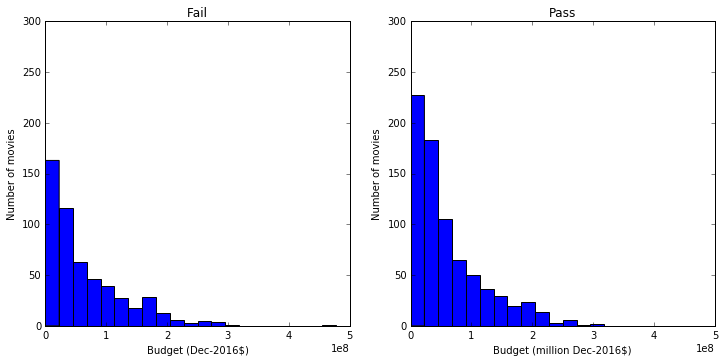

In [13]:
display(HTML('<h3>Budgets of {0:} movies released since {1:.0f} that pass or fail the Stupid test (n = {2:,.0f})</h3>'.format(hollywood_string,firstyear,len(movies_df))))

#x = movies_df['bechdel_passed'].apply(lambda x:float(x)+np.random.normal(0, 0.05))
#y = movies_df['budget_adj']
stupid_failer_budgets = movies_df.dropna()['budget_adj'][movies_df['stupid_passed'] == 0]
stupid_passer_budgets = movies_df.dropna()['budget_adj'][movies_df['stupid_passed'] == 1]
#plt.hist(failer_budgets,bins=30)

# Calculate best bin widths by Freedman-Draconis rule.
#The bin-width is set to h = 2 * IQR * n^(−1/3).
#So the number of bins is (max−min)/h.

stupid_fail_n = len(stupid_failer_budgets)
stupid_fail_iqr = scipy.stats.iqr(stupid_failer_budgets)
stupid_fail_binwidth = 2 * stupid_fail_iqr * (stupid_fail_n ** (-1/3))
stupid_fail_bins = (np.max(stupid_failer_budgets) - np.min(stupid_failer_budgets)) / stupid_fail_binwidth

stupid_pass_n = len(stupid_passer_budgets)
stupid_pass_iqr = scipy.stats.iqr(stupid_passer_budgets)
stupid_pass_binwidth = 2 * stupid_pass_iqr * (stupid_pass_n ** (-1/3))
stupid_pass_bins = (np.max(stupid_passer_budgets) - np.min(stupid_passer_budgets)) / stupid_pass_binwidth

stupid_nbins = int(np.round(np.mean([stupid_fail_bins,stupid_pass_bins]),0))
#print(nbins)

fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.hist(stupid_failer_budgets,bins=stupid_nbins,range=(0,500000000))
plt.ylim([0,300])
plt.xlabel('Budget (Dec-2016$)')
plt.ylabel('Number of movies')
plt.title('Fail')

ax2 = fig.add_subplot(222)
ax2.hist(stupid_passer_budgets,bins=stupid_nbins,range=(0,500000000))
plt.ylim([0,300])
plt.xlabel('Budget (million Dec-2016$)')
plt.ylabel('Number of movies')
plt.title('Pass')

fig.show()


When faced with data that covers such a wide range, sometimes it helps to plot the data on a logarithmic scale:

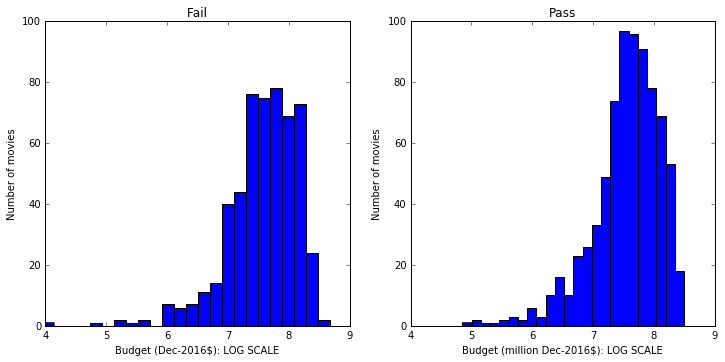

In [14]:
fig = plt.figure(figsize=(12,12))

stupid_failer_budgets_logged = np.log10(stupid_failer_budgets)
stupid_passer_budgets_logged = np.log10(stupid_passer_budgets)

stupid_faillog_n = len(stupid_failer_budgets_logged)
stupid_faillog_iqr = scipy.stats.iqr(stupid_failer_budgets_logged)
stupid_faillog_binwidth = 2 * stupid_faillog_iqr * (stupid_faillog_n ** (-1/3))
stupid_faillog_bins = (np.max(stupid_failer_budgets_logged) - np.min(stupid_failer_budgets_logged)) / stupid_faillog_binwidth

stupid_passlog_n = len(stupid_passer_budgets_logged)
stupid_passlog_iqr = scipy.stats.iqr(stupid_passer_budgets_logged)
stupid_passlog_binwidth = 2 * stupid_passlog_iqr * (stupid_passlog_n ** (-1/3))
stupid_passlog_bins = (np.max(stupid_passer_budgets_logged) - np.min(stupid_passer_budgets_logged)) / stupid_faillog_binwidth

stupid_log_nbins = int(np.round(np.mean([stupid_faillog_bins,stupid_passlog_bins]),0))

ax1 = fig.add_subplot(221)
ax1.hist(stupid_failer_budgets_logged,bins=stupid_log_nbins)#,range=(0.1,9))
plt.xlim([4,9])
plt.ylim([0,100])
plt.xlabel('Budget (Dec-2016$): LOG SCALE')
plt.ylabel('Number of movies')
plt.title('Fail')

ax2 = fig.add_subplot(222)
ax2.hist(stupid_passer_budgets_logged,bins=stupid_log_nbins)#,range=(0,500000000))
plt.xlim([4,9])
plt.ylim([0,100])
plt.xlabel('Budget (million Dec-2016$): LOG SCALE')
plt.ylabel('Number of movies')
plt.title('Pass')

fig.show()

The log-scale graph helps us see that there is definitely some difference in budgets between the two groups, although it's hard to tell at a glance what that difference is.

The best way to test for differences in data with such wide variation is to look for differences in the median. Finding the median budget in each group means let's line up all the budget values from lowest to highest and picking the one in the middle.

What are the median budgets of movies that fail and pass the Bechdel test? Which value is higher, and by how much?

In [15]:
stupid_failer_n = len(stupid_failer_budgets)
stupid_passer_n = len(stupid_passer_budgets)

stupid_failer_median_budget = stupid_failer_budgets.agg(np.median)
stupid_passer_median_budget = stupid_passer_budgets.agg(np.median)

print('Movies that fail the stupid test have a median budget of ${0:,.0f} (n={1:.0f}).'.format(stupid_failer_median_budget, stupid_failer_n))
print('Movies that pass the stupid test have a median budget of ${0:,.0f} (n={1:.0f}).'.format(stupid_passer_median_budget, stupid_passer_n))

stupid_median_difference = stupid_passer_median_budget - stupid_failer_median_budget
stupid_direction_string = '<b>'
if (stupid_median_difference < 0):
    stupid_direction_string += 'lower than'
elif (stupid_median_difference > 0):
    stupid_direction_string += 'higher than'
else:
    stupid_direction_string += 'equal to'
stupid_direction_string += '</b>'
stupid_median_difference = abs(stupid_median_difference)

display(HTML('<p>Movies that pass the stupid test have a median budget ${0:,.0f} {1:} those that fail.</p>.'.format(stupid_median_difference,stupid_direction_string)))

Movies that fail the stupid test have a median budget of $42,628,529 (n=533).
Movies that pass the stupid test have a median budget of $40,977,425 (n=764).


Is that difference in median budget statistically significant? That question calls for a Mann-Whitney U test.

In [17]:
display(HTML('<p>Is the difference in median budgets statistically significant?</p>'))
[ustat, pvalue] = scipy.stats.mannwhitneyu(stupid_failer_budgets, stupid_passer_budgets, use_continuity=True, alternative='two-sided')

if (pvalue < .05):
    print('YES')
else:
    print('NO')

print('p-value: ',pvalue)

stupid_pbc = scipy.stats.pointbiserialr(movies_df.dropna()['stupid_passed'],movies_df.dropna()['budget'])[0]

NO
p-value:  0.482962474528
